## TODO

* Título, lugar, fecha
* ¿Quién soy?
* Ley de Moore, computación paralela
* PySpark
* Historia de Dask
* Computación basada en grafos
* Evaluación perezosa
* Demo
* Limitaciones
* Machine Learning, XGBoost, GLM, más
* Algunos enlaces
  - Documentación http://dask.readthedocs.io/
  - Dask.distributed http://distributed.readthedocs.io/
  - Blog de Matthew Rocklin http://matthewrocklin.com/blog/
  - Última versión estable http://matthewrocklin.com/blog/work/2017/03/23/dask-0.14.1
  - Experimentos con streaming http://matthewrocklin.com/blog/work/2017/04/13/streaming

# Dask

<img src="img/dask.svg" width="300px" />

dask es una biblioteca de computación paralela orientada a la analítica. Está formada por dos componentes:

1. _Dynamic task scheduling_ optimizada para la computación.
2. Colecciones "Big Data" como arrays, DataFrames y listas paralelas, que mimetizan la forma de trabajar con NumPy, pandas o iteradores de Python para objetos más grandes que la memoria disponible o en entornos distribuidos. Estas colecciones funcionan sobre los _schedulers_.

Es un proyecto muy joven pero tiene determinadas propiedades que lo hacen muy interesante, entre ellas:

* **Familiar**: Dask replica la forma de trabajar con arrays de Numpy y DataFrames de pandas, así que la transición es mucho más sencilla que con otros sistemas.
* **Flexible**: Se integra bien con otros proyectos y provee herramientas para paralelizar nuestras propias funciones.
* **Nativo**: Es Python puro, no hay antipatrones ni comunicación con otros lenguajes.
* **Escalable**: Dask funciona tanto en clusters de 1000 nodos como en portátiles normales, optimizando el uso de memoria.
* **Amistoso**: Proporciona feedback inmediato y abundantes herramientas de diagnóstico.

![dask](img/collections-schedulers.png)

Vamos a hacer un ejemplo trivial con `dask.array` para comprobar cómo funciona la computación en dask.

In [1]:
import numpy as np
import dask.array as da

In [2]:
x = np.arange(1000)
y = da.from_array(x, chunks=100)

In [3]:
y

dask.array<array, shape=(1000,), dtype=int64, chunksize=(100,)>

Si intentamos efectuar cualquier operación sobre estos arrays, no se ejecuta inmediatamente:

In [4]:
op = y.mean()
op

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=()>

Dask en su lugar construye un grafo con todas las operaciones necesarias y sus dependencias para que podamos visualizarlo y razonar sobre él. Este grafo está almacenado en estructuras de datos corrientes de Python como diccionarios, listas y tuplas:

In [6]:
y.dask.dicts

{'array-72f4a9d7e59d592525f97b4055ecfbd1': {('array-72f4a9d7e59d592525f97b4055ecfbd1',
   0): (<function dask.array.core.getarray>,
   'array-original-72f4a9d7e59d592525f97b4055ecfbd1',
   (slice(0, 100, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   1): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(100, 200, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   2): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(200, 300, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   3): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(300, 400, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   4): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(400, 500, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   5): (<function dask.array.core.getarray>, 'array-original-72f4a9d7

In [8]:
op.dask.dicts

{'array-72f4a9d7e59d592525f97b4055ecfbd1': {('array-72f4a9d7e59d592525f97b4055ecfbd1',
   0): (<function dask.array.core.getarray>,
   'array-original-72f4a9d7e59d592525f97b4055ecfbd1',
   (slice(0, 100, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   1): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(100, 200, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   2): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(200, 300, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   3): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(300, 400, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   4): (<function dask.array.core.getarray>, 'array-original-72f4a9d7e59d592525f97b4055ecfbd1', (slice(400, 500, None),)),
  ('array-72f4a9d7e59d592525f97b4055ecfbd1',
   5): (<function dask.array.core.getarray>, 'array-original-72f4a9d7

Y podemos visualizarlo si tenemos instalada la biblioteca graphviz:

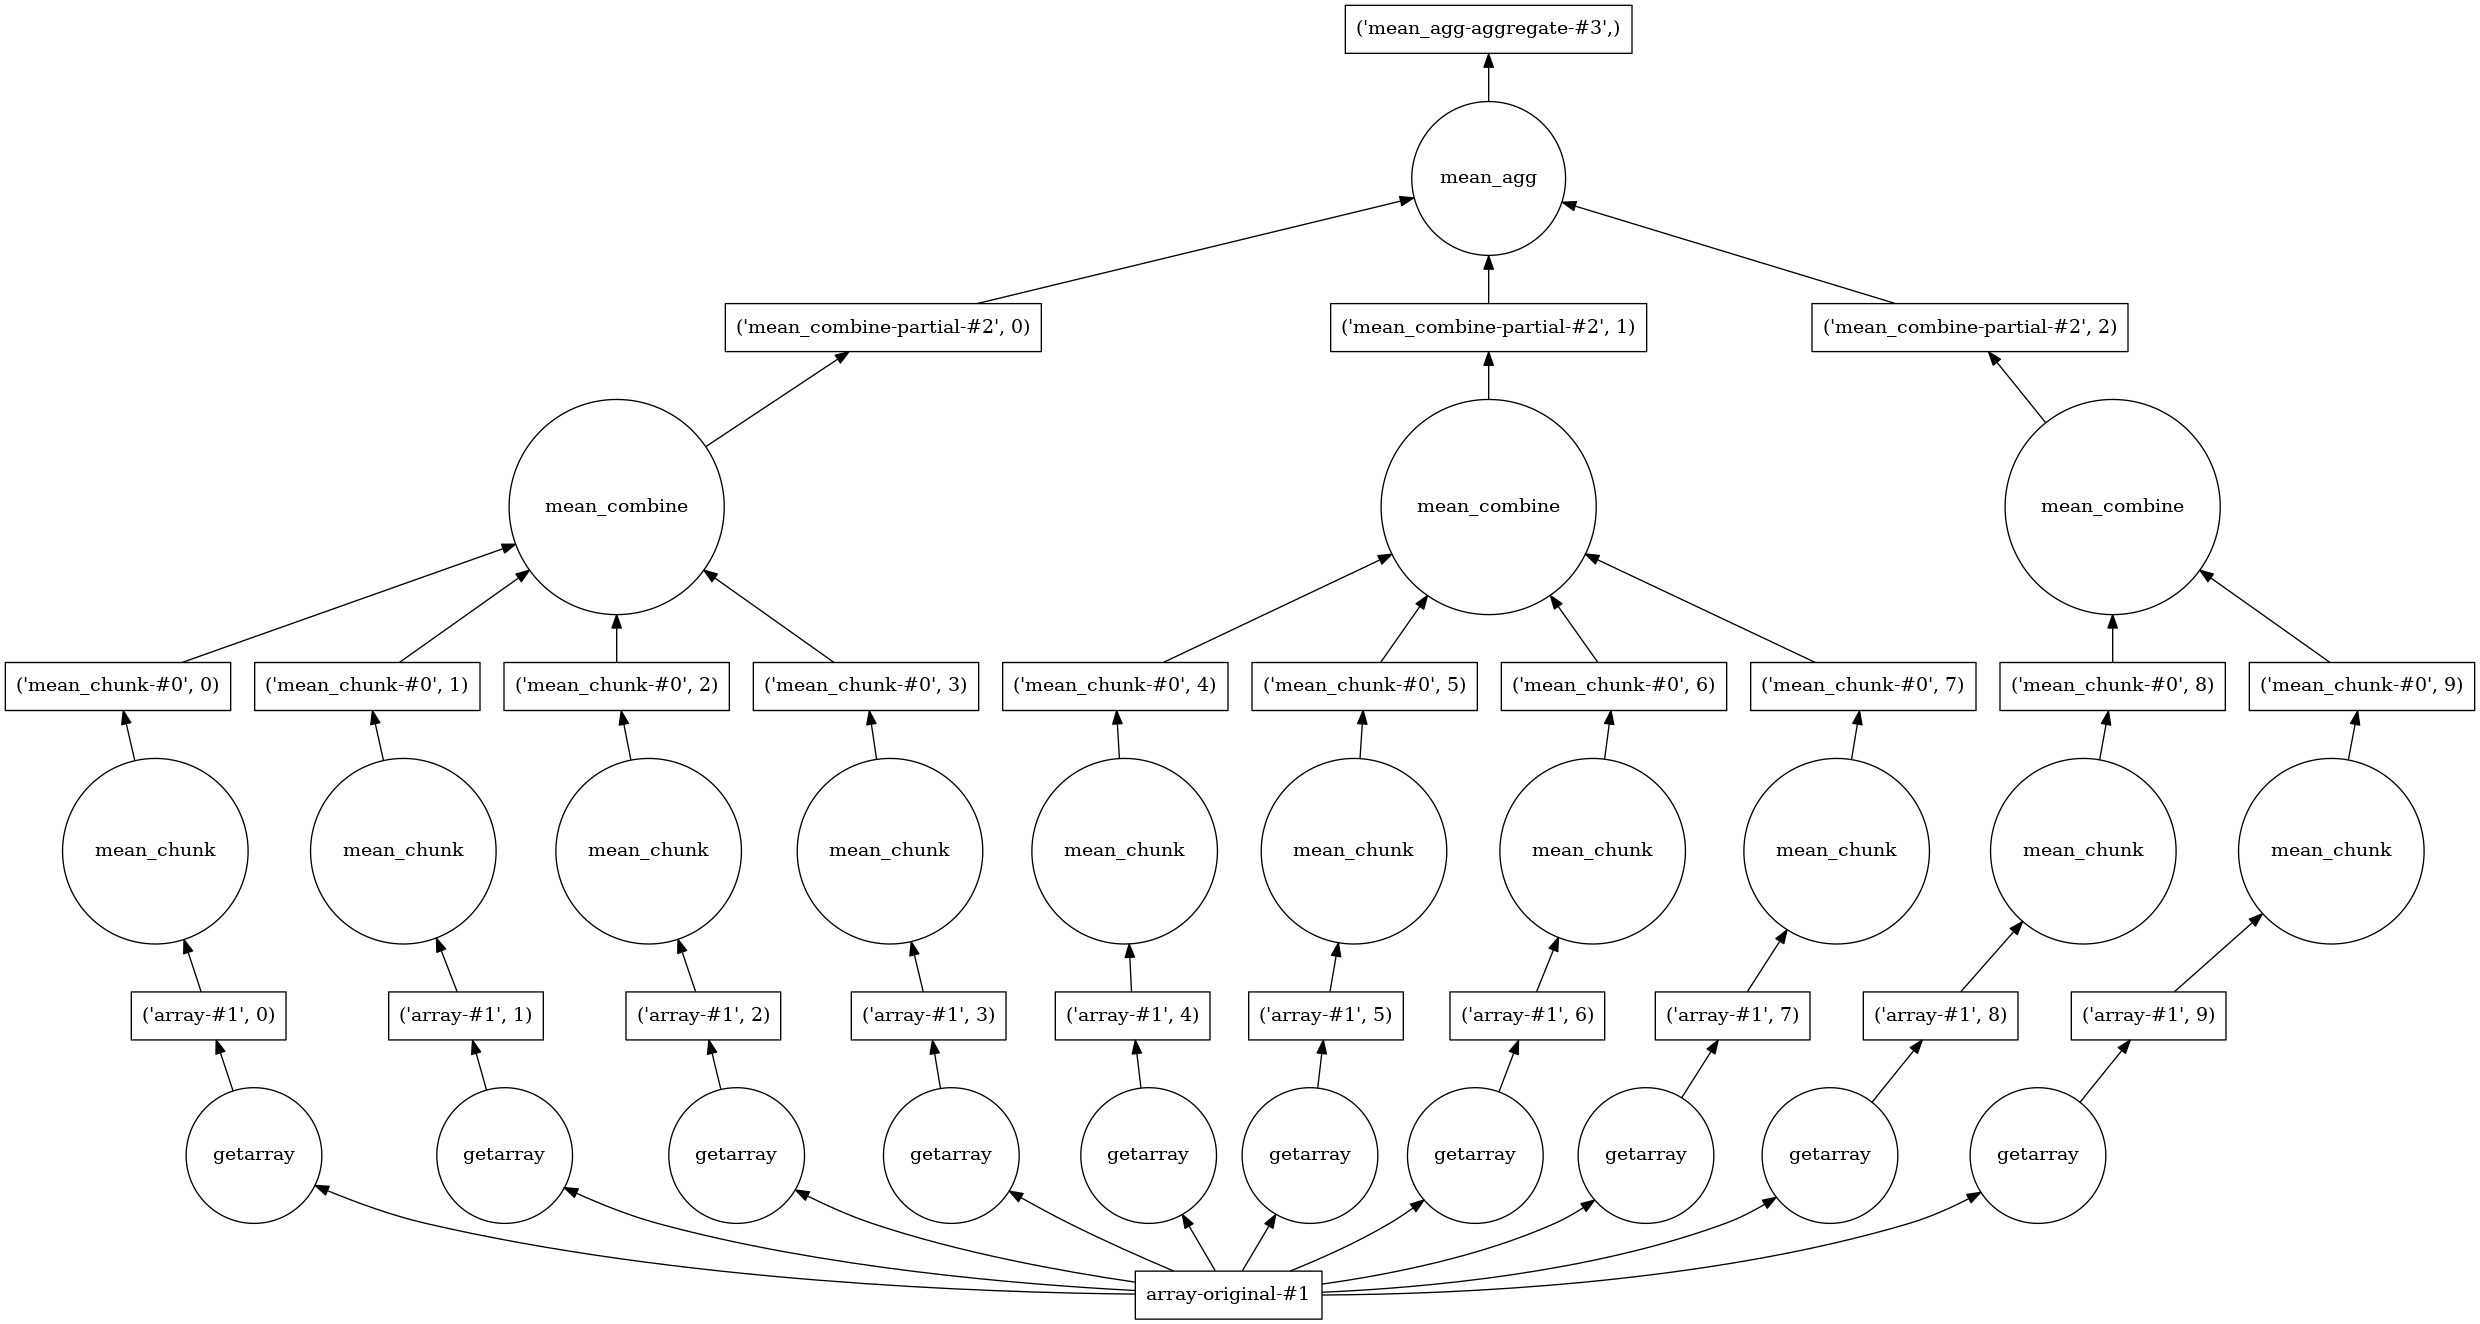

In [9]:
op.visualize()

Si queremos efectuar la operación, tendremos que llamar al método `.compute()`.

In [10]:
op.compute()

499.5

Si queremos convertir nuestro array original a array de NumPy, también se hace llamando a `compute()`:

In [11]:
y.compute()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Computación basada en grafos

Vamos a ver un ejemplo trivial de cómo maneja dask los grafos de tareas, cómo podemos definir nuestro propio flujo de trabajo y cómo optimizarlo para aprovechar mejor las capacidades del ordenador.

In [13]:
words = 'apple orange apple pear orange pear pear'

def print_and_return(string):
    print(string)
    return string

def format_str(count, val, nwords):
    return ('word list has {0} occurrences of {1}, '
            'out of {2} words').format(count, val, nwords)

Ejercicio: contar el número de ocurrencias de `pear`, `apple` y `orange`.

In [14]:
total = len(words.split())
for word in "pear", "apple", "orange":
    count = words.count(word)
    print_and_return(format_str(count, word, total))

word list has 3 occurrences of pear, out of 7 words
word list has 2 occurrences of apple, out of 7 words
word list has 2 occurrences of orange, out of 7 words


In [15]:
dsk = {
    'words': 'apple orange apple pear orange pear pear',
    'nwords': (len, (str.split, 'words')),
    'val1': 'orange',
    'val2': 'apple',
    'val3': 'pear',
    'count1': (str.count, 'words', 'val1'),
    'count2': (str.count, 'words', 'val2'),
    'count3': (str.count, 'words', 'val3'),
    'out1': (format_str, 'count1', 'val1', 'nwords'),
    'out2': (format_str, 'count2', 'val2', 'nwords'),
    'out3': (format_str, 'count3', 'val3', 'nwords'),
    'print1': (print_and_return, 'out1'),
    'print2': (print_and_return, 'out2'),
    'print3': (print_and_return, 'out3')
}

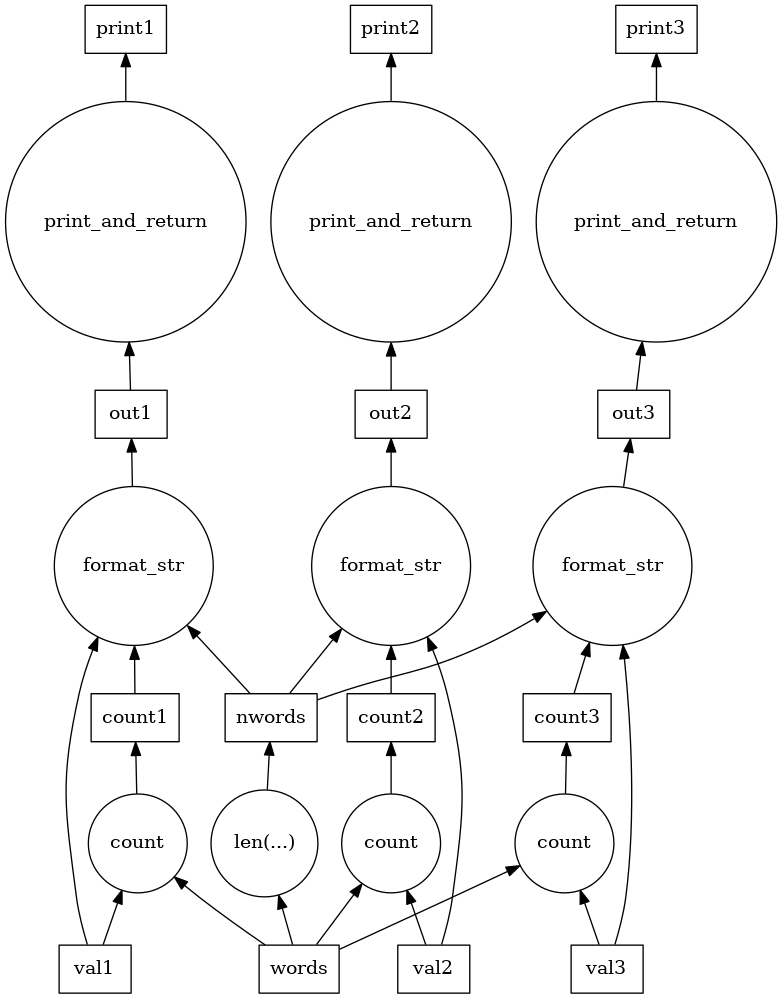

In [16]:
from dask.dot import dot_graph
dot_graph(dsk)

Si queremos obtener resultados parciales, Dask solo recorre la parte del grafo que nos interesa:

In [19]:
from dask.threaded import get

outputs = ['print1', 'print2']
results = get(dsk, outputs)
results

word list has 2 occurrences of apple, out of 7 wordsword list has 2 occurrences of orange, out of 7 words



('word list has 2 occurrences of orange, out of 7 words',
 'word list has 2 occurrences of apple, out of 7 words')

Observamos que no se está recorriendo el nodo `print3`. Esto es así porque Dask está eliminando operaciones innecesarias. Nosotros podemos reproducir ese proceso utilizando la función `cull`:

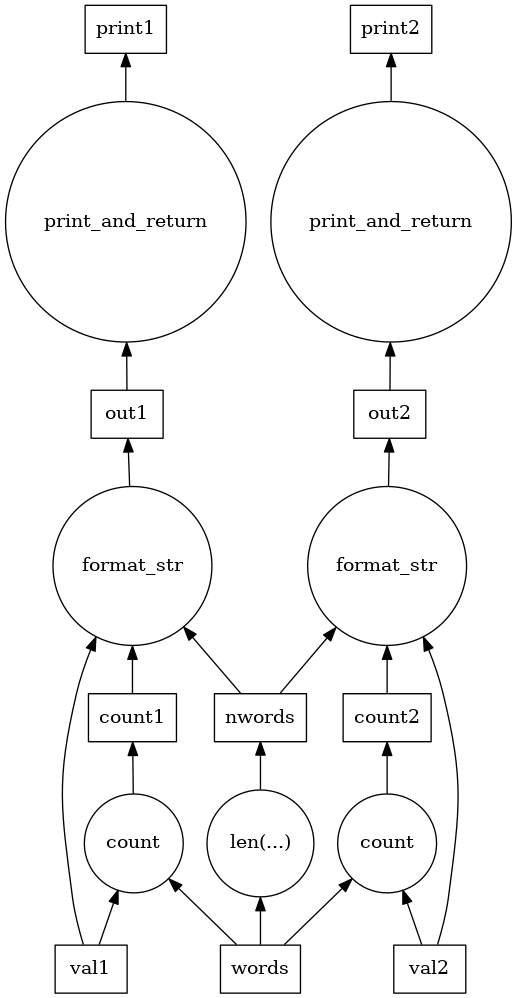

In [20]:
from dask.optimize import cull
dsk1, dependencies = cull(dsk, outputs)

dot_graph(dsk1)

Visto que varios nodos del grafo están accediendo a `val1` y `val2`, podemos fusionar esos accesos para simplificarlo.

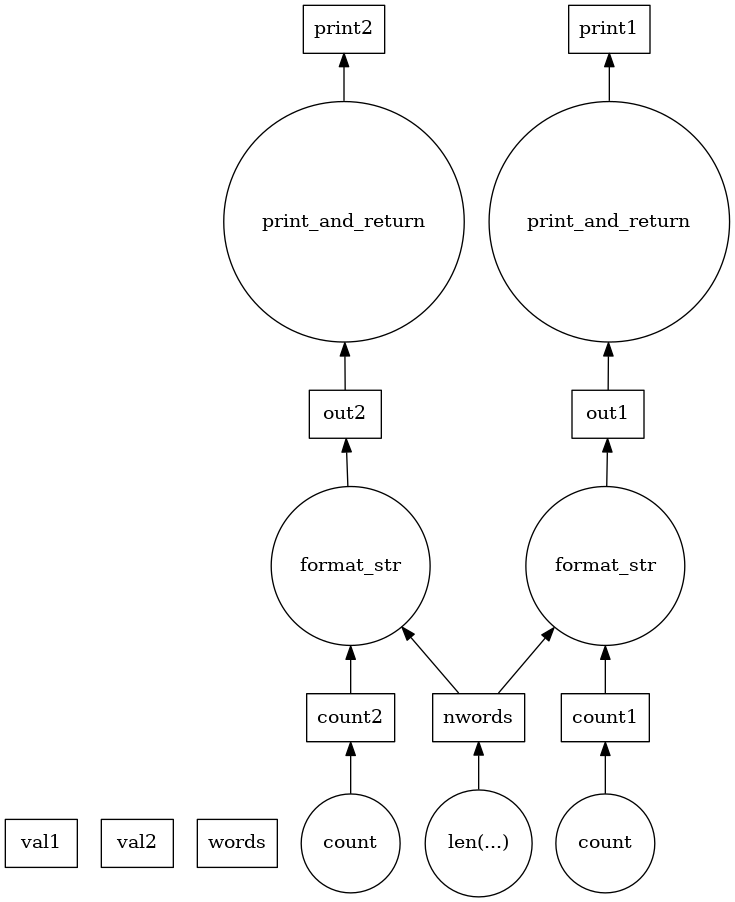

In [21]:
from dask.optimize import inline
dsk2 = inline(dsk1, dependencies=dependencies)

dot_graph(dsk2)

Nuestro grafo de tareas ya es _casi_ lineal, pero aún queda el conteo total de palabras como enlace. Supongamos que esta tarea es muy barata y que serializar el resultado para comunicarlo entre nodos es más costoso: en ese caso podemos duplicarla para conseguir separar las dos ramas.

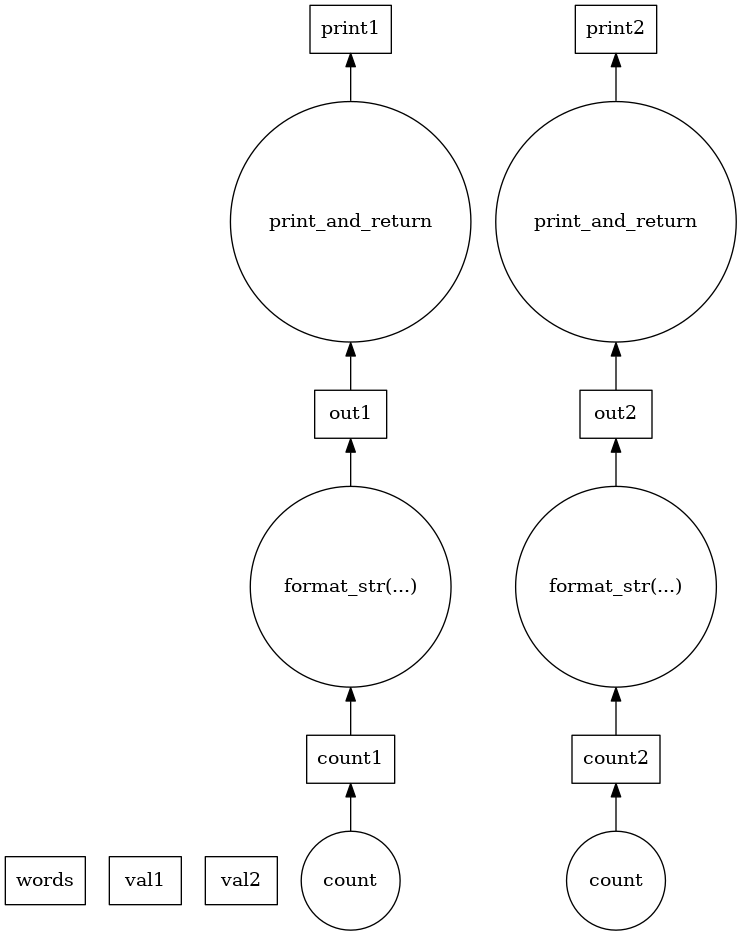

In [22]:
from dask.optimize import inline_functions
dsk3 = inline_functions(dsk2, outputs, [len, str.split], dependencies=dependencies)

dot_graph(dsk3)

Por último, podemos consolidar tareas para simplificar la apariencia del grafo:

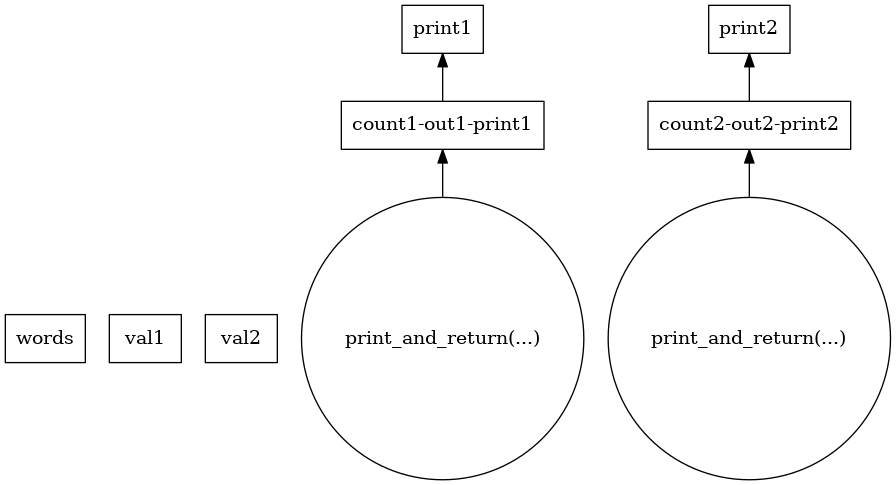

In [23]:
from dask.optimize import fuse
dsk4, dependencies = fuse(dsk3)

dot_graph(dsk4)

## Dask DataFrames y caso de uso: taxis de NYC

Otra de las estructuras de datos que provee pandas son los DataFrames, que se comportan de la misma manera que los DataFrames de pandas.

<img src="img/dask-dataframe.svg" width="300px" />

Para estudiar cómo funciona, vamos a descargar datos de trayectos de los taxis de New York:

In [25]:
!cat data/raw_data_urls.txt

https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-01.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-02.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-03.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2015-04.csv


In [26]:
!du data/yellow*.csv -h -s

du: cannot access 'data/yellow*.csv': No such file or directory


In [27]:
!cat data/download_raw_data.sh

cat raw_data_urls.txt | xargs -n 1 -P 6 wget -c -P data/


In [28]:
import dask.dataframe as dd

Tanto `dask.dataframe` como `dask.array` usan un _scheduler_ por defecto basado en hilos. En su lugar, vamos a utilizar una clase `Client`, la que emplearíamos si estuviéramos en un cluster.

In [29]:
from distributed import Client, progress

<div class="alert alert-info">**Nota**: En parte de la documentación y algunos tutoriales en Internet aparece también la clase `Executor`. Es equivalente a usar `Client` https://github.com/dask/distributed/blob/1.15.2/distributed/client.py#L2298</div>

Esta clase `Client`, cuando se utiliza en local, lanza un scheduler que minimiza el uso de memoria y aprovecha todos los núcleos de la CPU.

> "The dask single-machine schedulers have logic to execute the graph in a way that minimizes memory footprint." http://dask.pydata.org/en/latest/custom-graphs.html?highlight=minimizes%20memory#related-projects

In [30]:
client = Client()
client

<Client: scheduler='tcp://127.0.0.1:41225' processes=8 cores=8>

El servidor de diagnóstico está disponible en http://localhost:41225/status/.

In [31]:
df = dd.read_csv("data/yellow*.csv", parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

OSError: data/yellow*.csv resolved to no files

In [32]:
df.head()

NameError: name 'df' is not defined

In [27]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

Vamos a calcular la longitud del DataFrame:

In [28]:
# Esta operación bloquea el intérprete durante unos minutos
len(df)

51622905

Como se puede observar, el uso de memoria está contenido y todas las CPUs están trabajando.

![len](img/len_df.png)

También lo podemos hacer de manera asíncrona:

In [29]:
futures = client.submit(len, df)
futures

<Future: status: pending, key: len-0e3f941b29b7395f1785e5e7566c738f>

In [30]:
progress(futures)

Vamos ahora a calcular la distancia media recorrida en función del número de ocupantes. Igual que cuando usábamos `dask.array`, la operación no se efectúa automáticamente.

In [31]:
op = df.groupby(df.passenger_count).trip_distance.mean()
op

dd.Series<truediv..., npartitions=1>

In [32]:
f2 = client.compute(op)
f2

<Future: status: pending, key: finalize-14642408fb730ca74c9edc7856bf5eec>

<div class="alert alert-warning">El método `client.compute` almacena el resultado en un solo nodo, y por tanto debe usarse con cuidado. Para objetos grandes, es mejor usar `client.persist`.</div>

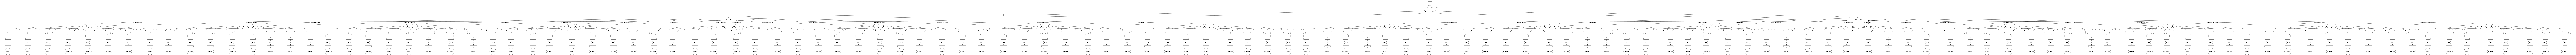

In [33]:
op.visualize()

In [34]:
progress(f2)

In [35]:
f2.result()

passenger_count
0     2.290985
1    21.676842
2    16.454595
3    -8.113091
4    11.334863
5     2.947984
6     2.862067
9     4.448462
7     4.036250
8     3.135000
Name: trip_distance, dtype: float64

In [37]:
df2 = df[(df.tip_amount > 0) & (df.fare_amount > 0)]    # filter out bad rows
df2['tip_fraction'] = df2.tip_amount / df2.fare_amount  # make new column

In [38]:
hour = df2.groupby(df2.tpep_pickup_datetime.dt.hour).tip_fraction.mean()
hour

dd.Series<truediv..., npartitions=1>

In [39]:
f_hour = client.compute(hour)

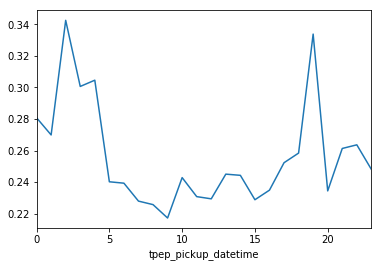

In [40]:
f_hour.result().plot()

In [41]:
payments = pd.DataFrame(
    {
        1: 'Credit Card',
        2: 'Cash',
        3: 'No Charge',
        4: 'Dispute',
        5: 'Unknown',
        6: 'Voided trip'
    }, index=["payment_name"]
).T

payments

,payment_name
1,Credit Card
2,Cash
3,No Charge
4,Dispute
5,Unknown
6,Voided trip


In [42]:
df2 = df.merge(payments, left_on='payment_type', right_index=True)

In [43]:
client.compute(df2.groupby(df2.payment_name).tip_amount.mean()).result()

payment_name
Cash           0.000231
Credit Card    2.744376
Dispute       -0.010375
No Charge      0.004947
Unknown        0.000000
Name: tip_amount, dtype: float64

In [44]:
zero_tip = df2.tip_amount == 0
cash     = df2.payment_name == 'Cash'

client.compute(dd.concat([zero_tip, cash], axis=1).corr()).result()

/home/jlcano/.miniconda3/envs/b2c36/lib/python3.6/site-packages/dask/dataframe/multi.py:592: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are aligned
.This assumption is not generally safe.
  warn("Concatenating dataframes with unknown divisions.\n"


,tip_amount,payment_name
tip_amount,1.000000,0.945019
payment_name,0.945019,1.000000


¿Qué significa este warning? En dask, algunas operaciones son sensibles al particionado http://dask.pydata.org/en/latest/dataframe-design.html#partitions así que tendremos que reindexar el DataFrame para que se alineen:

In [45]:
df2.passenger_count.resample('1d').compute()

ValueError: Can only resample dataframes with known divisions
See dask.pydata.io/en/latest/dataframe-partitions.html
for more information.

In [46]:
df2.npartitions

128

In [47]:
df2.divisions

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

In [48]:
df3 = df2.set_index('tpep_pickup_datetime')

In [49]:
df3.npartitions

128

In [50]:
df3.divisions

(Timestamp('2015-01-01 00:00:00'),
 Timestamp('2015-01-01 21:18:16'),
 Timestamp('2015-01-03 13:59:38'),
 Timestamp('2015-01-03 20:16:07'),
 Timestamp('2015-01-05 17:25:44.045454592'),
 Timestamp('2015-01-06 04:22:15.017876480'),
 Timestamp('2015-01-07 14:09:36'),
 Timestamp('2015-01-08 14:03:10.772727296'),
 Timestamp('2015-01-08 19:28:35'),
 Timestamp('2015-01-10 17:56:48'),
 Timestamp('2015-01-10 22:49:46'),
 Timestamp('2015-01-11 17:42:12.934895104'),
 Timestamp('2015-01-12 22:45:04'),
 Timestamp('2015-01-13 21:28:02'),
 Timestamp('2015-01-14 12:51:58.569814016'),
 Timestamp('2015-01-15 21:45:02'),
 Timestamp('2015-01-16 13:39:50'),
 Timestamp('2015-01-17 08:30:48'),
 Timestamp('2015-01-18 12:28:41.820513536'),
 Timestamp('2015-01-18 22:21:24.597705216'),
 Timestamp('2015-01-20 08:58:09.736321280'),
 Timestamp('2015-01-21 16:18:26'),
 Timestamp('2015-01-21 21:33:11'),
 Timestamp('2015-01-23 08:34:37'),
 Timestamp('2015-01-24 04:47:14.090909184'),
 Timestamp('2015-01-24 16:32:12'),


<div class="alert alert-warning">Las operaciones que requieren reordenar el dataset tienen consideraciones de rendimiento especiales y pueden no ser aptas para realizarse en local.

In [51]:
daily_mean = df3.passenger_count.resample('1d').mean()
daily_mean

dd.Series<resampl..., npartitions=93, divisions=(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-01-03 00:00:00'), Timestamp('2015-01-05 00:00:00'), ..., Timestamp('2015-04-30 00:00:00'), Timestamp('2015-04-30 00:00:00'))>

In [ ]:
# No ejecutar en local
#daily_mean.compute().plot()